In [1]:
import gymnasium as gym
import pkg_resources
import numpy as np
from factory_env.envs.parameters import env_param
import matplotlib.pyplot as plt

/home/zhicun/miniconda3/envs/ros2_env/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:160: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(
/home/zhicun/miniconda3/envs/ros2_env/lib/python3.10/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


shape of waypoints: (8, 2)
shape of even_trajectory: (61, 2)
length of the reference trajectory: 6.08 m
shape of ghost_trajectory: (500, 2)
shape of yaw_angles: (61,)
shape of ghost_yaw_angles: (500,)
shape of obstacles in ndarray format: (8, 3)
number of obstacles: 8
shape of walls: (129, 2)
None


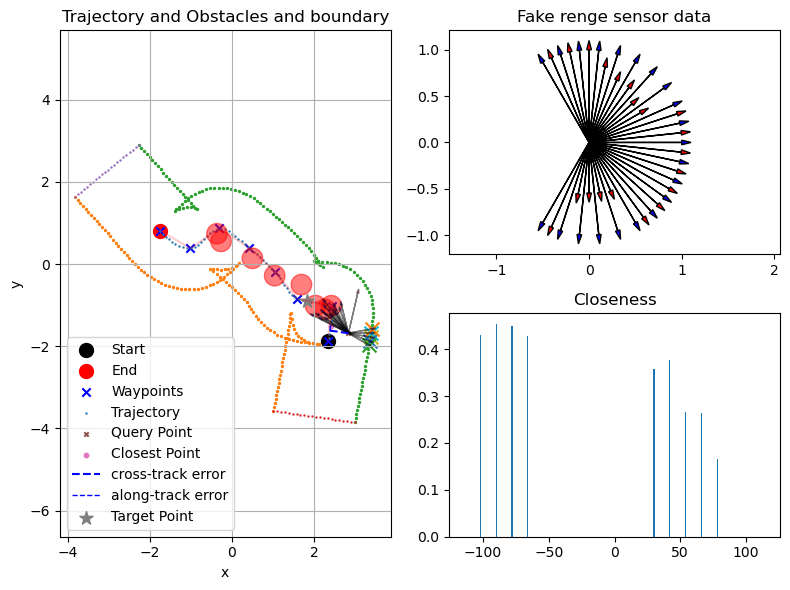

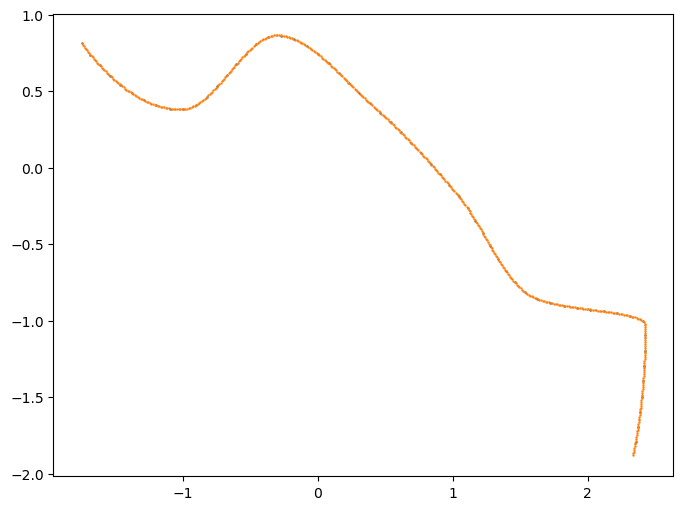

In [3]:
options = {'init_type': 'load', 'file_name': 'test.pkl'}
# options = {'init_type': 'run', 'file_name': 'test.pkl'}
# options = {'init_type': 'save', 'file_name': 'test.pkl'}
params:env_param = env_param()

env = gym.make('training-factory-v0', params=params,
               use_saved_map=True, render_mode="human")
# action = env.action_space.sample()
# print(action)
next_obs, info = env.reset()
print(env.path.print_shape())
# print(next_obs)
# # wheel_speed = env.action_space.sample()
for i in range(100):
    plt.cla()
    env.step() 
    env.render()
    plt.pause(0.5)

In [7]:
import math
import numpy as np
def check_point_position(start, angle, point):
    # Define the vector of the line based on the angle
    line_vector = [math.cos(math.radians(angle)), math.sin(math.radians(angle))]
    
    # Compute the vector between the start of the line and the point
    point_vector = [point[0]-start[0], point[1]-start[1]]

    # Calculate the Z component of the cross product
    cross_product_z = line_vector[0]*point_vector[1] - line_vector[1]*point_vector[0]

    if cross_product_z > 0:
        return "Left"
    elif cross_product_z < 0:
        return "Right"
    else:
        return "On the line"

# Test the function
start = (-0.232, -5.801)
angle = np.rad2deg(-5.089)
point = (-0.507, -5.953)

print(check_point_position(start, angle, point))

Left


In [25]:
import numpy as np

# Initial array
a = np.array([[1,2,3,4], [2,2,5,2], [3,4,6,5], [1,2,4,5]])

# Sort starting from the second row by the third column
sort_indices = np.argsort(a[1:,2])
a[1:] = a[1:][sort_indices]

print(a)


[[1 2 3 4]
 [1 2 4 5]
 [2 2 5 2]
 [3 4 6 5]]


In [26]:
import numpy as np

points = [np.array([ 1.108, -5.447]), np.array([ 1.166, -5.365]), np.array([ 1.045, -5.526]), np.array([ 1.22, -5.28]), np.array([ 0.979, -5.603])]

center = np.mean(points, axis=0)

print("Center:", center)


Center: [ 1.1036 -5.4442]


In [41]:
import numpy as np
np.set_printoptions(precision=1, suppress=True)

# Initial array
a = np.array([
    [0.157, -2.995, 0.315, 1000, 1, 1],
    [0.247, -2.767, 0.543, 1000, 1, 1],
    [0.183, 1.092, -1.881, 1000, 1, 1],
    [0.103, 1.544, -1.429, 1000, 1, 1],
    [0.088, 2.647, -0.326, 1000, 1, 1]
])
tmpa = a.copy()
tmpa[:,1] = np.rad2deg(tmpa[:,1])
print(tmpa)
# Create the mask for negative values in the second column and 1s in the fourth and fifth columns
mask = (a[:, 1] < 0) & (a[:, 3] == 1000) & (a[:, 4] == 1) & (a[:, 5] == 1)

# Modify the elements according to the condition
a[mask, 1] = np.deg2rad(360) - np.abs(a[mask, 1])

tmpa = a.copy()
tmpa[:,1] = np.rad2deg(tmpa[:,1])
print(tmpa)

[[   0.2 -171.6    0.3 1000.     1.     1. ]
 [   0.2 -158.5    0.5 1000.     1.     1. ]
 [   0.2   62.6   -1.9 1000.     1.     1. ]
 [   0.1   88.5   -1.4 1000.     1.     1. ]
 [   0.1  151.7   -0.3 1000.     1.     1. ]]
[[   0.2  188.4    0.3 1000.     1.     1. ]
 [   0.2  201.5    0.5 1000.     1.     1. ]
 [   0.2   62.6   -1.9 1000.     1.     1. ]
 [   0.1   88.5   -1.4 1000.     1.     1. ]
 [   0.1  151.7   -0.3 1000.     1.     1. ]]


In [46]:
sector_bound_angle = np.deg2rad(120)
sectors = np.linspace(-sector_bound_angle, sector_bound_angle, 21) # angles from -angle_threshold to angle_threshold, divided into num_of_sectors sectors
print(np.rad2deg(sectors))
print(sectors.shape)
angles_of_sectors = sectors[:-1] + np.diff(sectors) / 2
print(angles_of_sectors.shape)
print(np.rad2deg(angles_of_sectors))

[-120. -108.  -96.  -84.  -72.  -60.  -48.  -36.  -24.  -12.    0.   12.
   24.   36.   48.   60.   72.   84.   96.  108.  120.]
(21,)
(20,)
[-114. -102.  -90.  -78.  -66.  -54.  -42.  -30.  -18.   -6.    6.   18.
   30.   42.   54.   66.   78.   90.  102.  114.]


In [48]:
min_bound = -np.deg2rad(120)
max_bound = np.deg2rad(120)
r = np.deg2rad(5) # resolution
sensor_angles = np.linspace(min_bound, max_bound, int(np.rint(abs((max_bound - min_bound) / r) + 1)))
slopes = np.tan(sensor_angles)
which_side  = sensor_angles >= 0
print(np.rad2deg(sensor_angles))
print(slopes)
print(which_side)

[-120. -115. -110. -105. -100.  -95.  -90.  -85.  -80.  -75.  -70.  -65.
  -60.  -55.  -50.  -45.  -40.  -35.  -30.  -25.  -20.  -15.  -10.   -5.
    0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.]
[ 1.7e+00  2.1e+00  2.7e+00  3.7e+00  5.7e+00  1.1e+01 -1.6e+16 -1.1e+01
 -5.7e+00 -3.7e+00 -2.7e+00 -2.1e+00 -1.7e+00 -1.4e+00 -1.2e+00 -1.0e+00
 -8.4e-01 -7.0e-01 -5.8e-01 -4.7e-01 -3.6e-01 -2.7e-01 -1.8e-01 -8.7e-02
  0.0e+00  8.7e-02  1.8e-01  2.7e-01  3.6e-01  4.7e-01  5.8e-01  7.0e-01
  8.4e-01  1.0e+00  1.2e+00  1.4e+00  1.7e+00  2.1e+00  2.7e+00  3.7e+00
  5.7e+00  1.1e+01  1.6e+16 -1.1e+01 -5.7e+00 -3.7e+00 -2.7e+00 -2.1e+00
 -1.7e+00]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  

In [54]:
arr = np.array([[1, 4, 7],
                [2, 5, 8],
                [3, 6, 9],
                [4, 7, 1],
                [5, 8, 2],
                [6, 9, 3],
                [7, 1, 4],
                [8, 2, 5]])
sort_indices = np.argsort(arr[:, 2])
arr_after_sort = arr[sort_indices][0]
print(arr_after_sort)

[4 7 1]


In [63]:
np.set_printoptions(precision=5, suppress=True)

a = np.array([1, 1, 0.29425699, 0.2659913])
indices = np.argsort(a, axis=0)
sorted_a = a[indices]
print(indices)
print(sorted_a)

[3 2 0 1]
[0.26599 0.29426 1.      1.     ]


In [13]:
resolution = np.deg2rad(6)
print(resolution)
min_bound = -np.deg2rad(120)
max_bound = np.deg2rad(120)
N_of_sensors = int(np.rint(abs((max_bound - min_bound) / resolution))) + 1
print(N_of_sensors)

beams = np.linspace(min_bound, max_bound, N_of_sensors) # could +1 but here we choose not to
print(beams)
print(np.diff(beams))
Ss = np.deg2rad(240)
theta = Ss / (N_of_sensors - 1)
print(theta)
print(np.rad2deg(theta))

0.10471975511965978
41
[-2.094 -1.99  -1.885 -1.78  -1.676 -1.571 -1.466 -1.361 -1.257 -1.152
 -1.047 -0.942 -0.838 -0.733 -0.628 -0.524 -0.419 -0.314 -0.209 -0.105
  0.     0.105  0.209  0.314  0.419  0.524  0.628  0.733  0.838  0.942
  1.047  1.152  1.257  1.361  1.466  1.571  1.676  1.78   1.885  1.99
  2.094]
[0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105
 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105
 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105 0.105
 0.105 0.105 0.105 0.105]
0.10471975511965977
6.0


In [ ]:

r_oa -= (1 + np.abs(gamma_theta * np.pi)) ** -1 * (reward_param.gamma_x * 5**2) ** -1